In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D



In [48]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [37]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [40]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1) 

In [41]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=128, activation='tanh'))

model.add(Dense(units=10, activation = 'softmax'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d_6 (Average (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, 
          epochs=10, 
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2933 - accuracy: 0.9136 - val_loss: 0.1394 - val_accuracy: 0.9579
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1209 - accuracy: 0.9637 - val_loss: 0.1100 - val_accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0829 - accuracy: 0.9746 - val_loss: 0.0799 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.0612 - val_accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0510 - accuracy: 0.9841 - val_loss: 0.0609 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.0531 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0518 -

In [43]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2464 - accuracy: 0.9263
Epoch 2/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0887 - accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0627 - accuracy: 0.9810


In [46]:
predictions = model.predict(x_test)
print(np.argmax(predictions[10]))


0


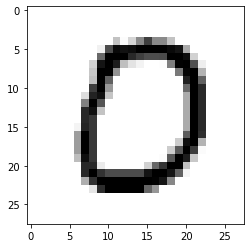

In [49]:
plt.imshow(x_test[10],cmap=plt.cm.binary)
plt.show()